# pandas 入门

pandas是贯穿本书后续部分的主要工具。它所包含的数据结构和数据处理工具的设计使得在Python中进行数据清洗和分析非常快捷。pandas经常是和其他数值计算工具，比如Numpy或是SciPy，以及数据可视化工具，比如matplotlib一起使用的。pandas支持大部分NumPy语言风格的数组计算，尤其是数组函数以及没有for循环的各种数据处理。  
尽管pandas采用了很多Numpy的代码风格，**但最大的不同在于pandas是用来处理表格型或异质型数据的**。而Numpy则相反，它更适合处理**同质型的数值类数组数据**。

In [84]:
import pandas as pd
import numpy as np

## 数据结构介绍
两个常用的工具数据结构：Series和DataFrame

### Series
Series是**一维的数组型对象**，它包含了一个值序列（与Numpy中的类型相似），并且包含了与数值对应的数据标签，称为索引（index）。最简单的序列可以仅仅由一个数组形成：

In [86]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

+ 交互式环境中Series的字符串表示：索引在左边，值在右边。由于我们不为数据指定索引，默认生成的索引是从0到N-1（N是数据的长度）。可以通过**values属性**和**index属性**分别获得Series对象的值和索引：

In [88]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [90]:
obj.index#range(4)类似

RangeIndex(start=0, stop=4, step=1)

+ 可以创建一个索引序列（index参数），用标签表示每个数据点：

In [92]:
obj2 = pd.Series([4, 7, -5, 3],index = ['d','b','a','c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

与NumPy相比的数组相比，你可以在数据中选择数据的时候使用标签来进行索引：

In [108]:
obj2['a']

-5

可以直接在原视图进行修改

In [109]:
obj2['d'] = 6
obj2

d    6
b    7
a   -5
c    3
dtype: int64

进行多个索引

In [9]:
obj2[['c','a','d']]

c    3
a   -5
d    6
dtype: int64

+ **对Series创建的对象，可以使用Numpy的函数或Numpy风格的操作，比如使用布尔值数组进行过滤，与标量相乘，或是应用数学函数，这些操作将保存索引值连接：**

In [10]:
#用布尔值数组进行过滤
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [11]:
#与标量相乘
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [12]:
#应用数学函数
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

+ 从另一个角度考虑Series，可以认为它是一个长度固定且有序的字典，因为它将索引值和数据按位置配对。在可能使用字典的上下文，也可以使用Series。**下面是判断某个字符串是否在Series的索引值的集合里**

In [13]:
'b' in obj2

True

In [14]:
'e' in obj2

False

创建Series方式之二：如果已经有数据包含在Python字典中，可以使用字典生成一个Series：

In [15]:
sdata = {'Ohio':35000, 'Texas':71000, 'Oregon':16000, 'Utah':5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

+ 当把字典传递给Series构造函数时，产生的Series的索引将是排序好的字典键。但是可以创建一个索引序列，将想要的顺序传递给构造函数，从而使生成的Series的索引顺序符合预期：

In [16]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index = states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

上面的例子中，sdata中的三个值被放置在正确的位置，但是因为'California'没有出现在sdata的键中，它对应的值是NaN（not a number），这是pandas中标记缺失值或NA值的方式。因为'Utah'并不在states中，它被排除在结果对象外。  在后面学习的过程中，将继续使用“缺失”或“NA”来表示缺失值。pandas中用isnull和notnull函数来检查缺失数据：

In [17]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [18]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

idnull和notnull也是Series的实例方法：

In [19]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [20]:
obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

+ **Series的一个非常有用的特性：`数据对齐特性。`在数学操作中会自动对齐索引**

In [21]:
obj3 + obj4#具体特性在后续章节讨论

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

**Series对象自身和其索引都有name属性**，这个特性与pandas其他重要功能集中在一起：

In [22]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

**Series的索引可以通过按位置赋值的方式进行改变：**

In [23]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [24]:
obj.index = ['Bob','Steve','Jeff','Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame
DataFrame表示的是矩阵的数据表（个人认为是一个二维结构），它包含一排序的列集合，每一列可以是不同的值类型（数值，字符串，布尔值等）。DataFrame`既有行索引也有列索引`，它可以被视为一个共享（行）索引的Series的字典。在DataFrame中，数据被存储为一个以上的二维快，而不是列表、字典或其他一维数组的集合。

+ 分层索引在第八章介绍

**DataFrame的构建方式之一：**利用包含等长度的列表或者Numpy数组**的字典**来形成DataFrame。产生的DataFrame会自动为Series分配索引，其中列索引是字典中的每个键名，行索引默认为0、1、2、3、....，并且会按照排列顺序的顺序排列

In [25]:
data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'],
        'year':[2000, 2001, 2002, 2001,2002, 2003],
        'pop':[1.5,1.7,3.6,2.4,2.9,3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [26]:
#可利用head()方法查看前n行的数据，默认前5行
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


如果默认的顺序不是你期望的顺序（利用column指定列的顺序），也可以按照自己喜欢的顺序排列：

In [27]:
pd.DataFrame(data, columns = ['year','state','pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


如果所传的列不在包含的字典中，将会在结果中出现缺失值；另外，可以通过index`指定`行索引

In [28]:
frame2 = pd.DataFrame(data,columns=['year','state','pop','debt'],
                      index=['one','two','three','four','five','six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


DataFrame中的一列，可以按字典标记或属性那样检索为Series：
+ 注意：frame2['column']对任意列名都有效，但是frame2.column只在列名是有效的python变量时有效

In [29]:
frame2['state']#按字典标记

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [30]:
frame2.year#按属性

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

+ **注意：返回的Series和DataFrame有相同的行索引，并且Series的name属性也会被合理地设置**

列的引用是可以进行修改的。例如，空的‘debt’列可以赋值为标量值或值数组：

In [31]:
frame2['debt'] = 16.5#标量赋值
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [32]:
frame2['debt'] = np.arange(6.)#向量赋值
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


在将列表或数组赋值给一个列时，值的长度必须和DataFrame的长度匹配。  
如果将Series赋值给一列时，Series的索引将会按照DataFrame的索引重新排列，并在空缺的地方填充缺失值：

In [33]:
val = pd.Series([-1.2, -1.5, -1.7],index=['two','four','five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


+ 如果被赋值的列不存在，则会生成一个新的列。del关键字可以像在字典中那样对DataFrame进行删除列的操作。

In [34]:
#先增加一列，这一列是布尔值，判断条件时state列是否为‘ohio'
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


删除DataFrame中的列

In [35]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

>注：frame2.eastern的语法无法创建新的列

+ 从DataFrame中选取的列是数据的视图，而不是拷贝。因此，对Series的修改会映射到DataFrame中。如果需要复制，则应该显示地使用Series的copy方法

In [36]:
a_lie = frame2.year.copy
a_lie

<bound method NDFrame.copy of one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64>

**DataFrame的构建方式之二：**包含字典的嵌套字典。若嵌套字典被赋值给DataFrame，pandas会将字典的键作为列索引，将内部字典的键作为行索引：

In [37]:
pop = {'Nevada':{2001:2.4,2002:2.9},'Ohio':{2000:'1.5',2001:'1.7',2002:'3.6'}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


可以使用类似Numpy的语法对DataFrame进行转置操作（调换行和列）：

In [38]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


内部字典的键被联合、排序后形成了结果的索引。如果已经显示指明索引的话，内部字典的键将不会被排序：

**DataFrame创建方式之三**：包含Series的字典可以用于构造DataFrame：

In [39]:
pdata = {'Ohio':frame3['Ohio'][:-1],'Nevada':frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


可以向DataFrame构造函数传递的对象列表见下表：

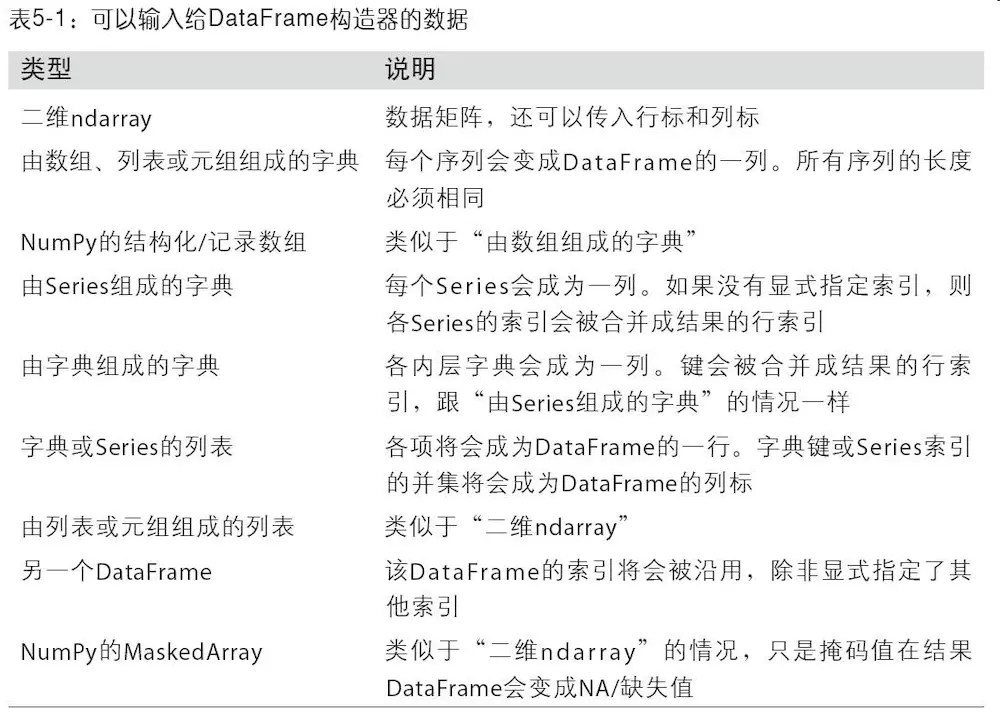

如果DataFrame的索引（index）和列（column）拥有name属性，则这些属性也会被显示：

In [40]:
frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


和Series类似，DataFrame的values属性会将包含在DataFrame中的数据以二维ndarray的形式返回：

In [41]:
frame3.values

array([[nan, '1.5'],
       [2.4, '1.7'],
       [2.9, '3.6']], dtype=object)

> 注：如果DataFrame的列是不同的dtypes，则values的dtype会自动选择合适所有列的类型，如下所示

In [42]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### 索引对象(行与列索引都包括)
pandas中的索引（index）对象是用于存储轴标签和其他元素数据的（例如轴名称或标签）。在构造Series或DataFrame时，所使用的任意数组或标签序列都可以在内部转换为索引对象：

In [43]:
obj = pd.Series(range(3),index = ['a','b','c'])
obj

a    0
b    1
c    2
dtype: int64

In [44]:
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

索引对象中的元素是不可改变的，因此用户是无法修改索引对象的。
+ 可以重新给DataFrame赋值索引
+ 注意是**索引对象**

In [46]:
index[1] = 'd'#pandas的索引对象的单个元素不可更改

TypeError: Index does not support mutable operations

In [ ]:
obj.index = [1,2,3]#整体可以进行重新赋值
obj

>**不可变可以使Index对象在多个数据结构之间安全共享：**

由pd.Index()创建的索引，不能对其做修改。

In [47]:
lables = pd.Index(np.arange(3))
lables

Int64Index([0, 1, 2], dtype='int64')

In [48]:
obj2 = pd.Series([1.5,-2.5,0],index = lables)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [49]:
obj2.index is lables #引用，内存地址一样

True

> 虽然用户不需要经常使用Index的功能，但是因为一些操作会生成包含被索引化的数据，理解它们的工作原理是很重要的。

 + is 和 == 的区别  
is是判断两个对象的内存地址是否一样  
== 是判断两个对象的内容是否一致   
\>>> a = [1, 2, 3]  
\>>> b = a  
\>>> b is a   
True  
\>>> b == a  
True  
\>>> b = a[:]  #列表切片是浅复制  
\>>> b is a  
False  
\>>> b == a  
True  

In [50]:
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

除了类似于数组，**索引对象**也像一个固定大小的**集合：**

In [51]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [52]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [53]:
'Ohio' in frame3.columns

True

In [54]:
2003 in frame3.columns#列标签机和

False

与python集合不同，pandas索引对象可以包含重复标签；根据重复标签进行筛选，会选取所有重复标签对应的数据。

In [55]:
dup_labels = pd.Index(['foo','foo','bar','bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

每个索引都有一些方法和属性，它们可用于设置逻辑并回答有关该索引所包含的数据的常见问题。表5-2列出了这些函数。
+ **是索引的方法和属性，pd.Index对象**

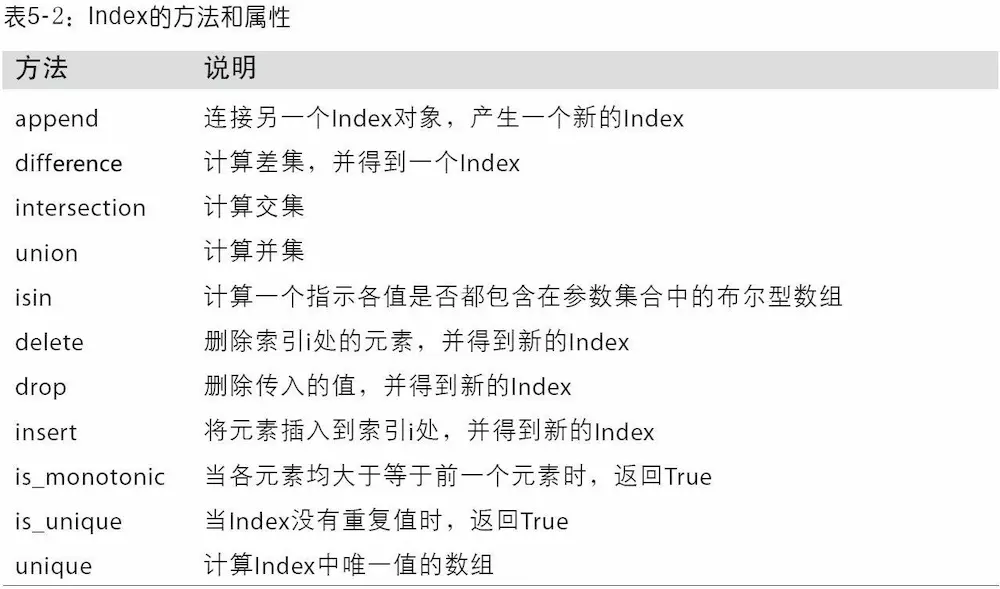

## 基本功能

### 重建索引

+ reindex是pandas对象的重要方法，该方法用于创建一个符合新索引的新对象。例如：

In [56]:
obj = pd.Series([4.5,7.2,-5.3,3.6],index = ['d','b','a','c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

+ Series调用reindex方法时，会将数据按照新的索引进行排列，如果某个索引值之前并不存在，则会引入缺失值,不会影响排列顺序：

In [57]:
obj2 = obj.reindex(['a','b','c','d','e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

对于顺序数据，比如时间序列，在重建索引时可能会需要进行插值或填值。method可选参数允许我们使用诸如ffill等方法在重建索引时插值，ffill方法会将值前向填充。

In [58]:
obj3 = pd.Series(['blue','purple','yellow'],index=[0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [59]:
obj3.reindex(range(6), method = 'ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [60]:
obj4 = pd.Series(['blue','purple','yellow'],index=[0,2,4])
obj4.reindex(['a','b','c','d'],method='ffill')#not supported between instances of 'str' and 'int'

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
obj5 = pd.Series(['blue','purple','yellow'],index=['0','2','4'])
obj5.reindex(['a','b','c','d'],method='ffill')#可以转换

在DataFrame中，reindex可以改变行索引、列索引，也可以同时改变二者**reindex(index=, columns=)**。当仅传入一个序列时，结果中的行会重建索引。

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3,3)),index=['a','c','d'],
                    columns=['Ohio','Texas','California'])
frame

In [ ]:
frame2 = frame.reindex(index=['a','b','c','d'])
frame2

列可以使用columns关键字重建索引：

In [ ]:
states = ['Texas','Utah','California']
frame.reindex(columns=states)

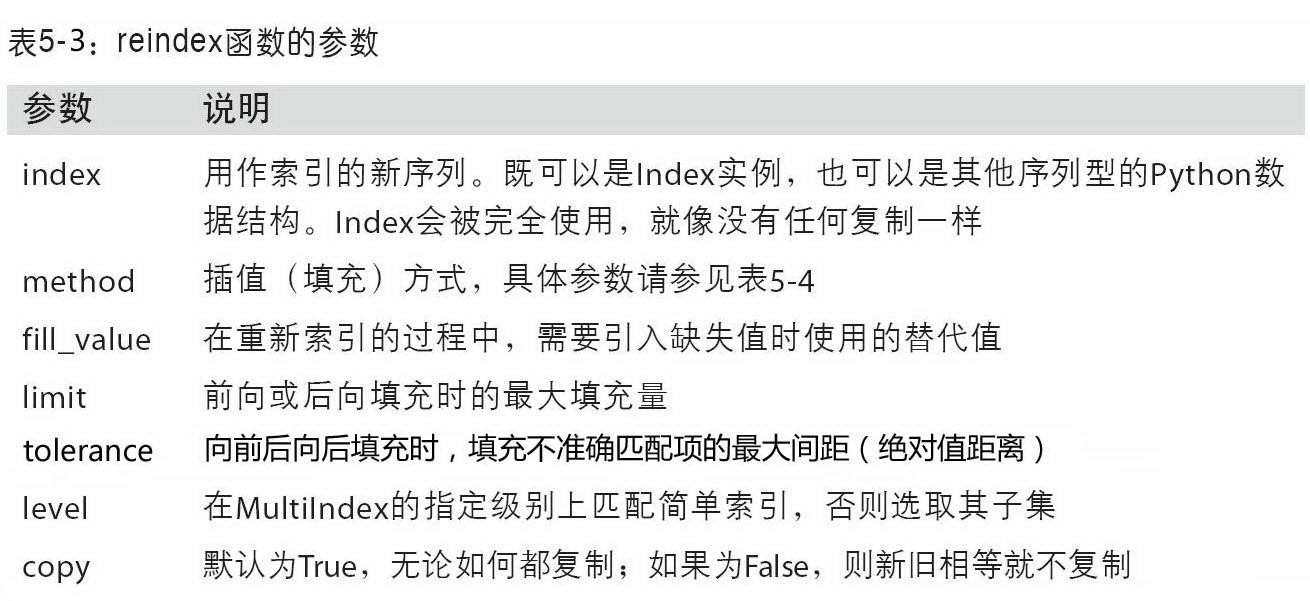

### 轴向上删除条目
drop`方法`可以用于删除轴向上条目，并且会返回一个在指定轴上删除了指定值的新对象

In [ ]:
obj = pd.Series(np.arange(5.), index=['a','b','c','d','e'])
obj

In [ ]:
obj.drop('c')

In [ ]:
obj.drop(['d','c'])#在指定轴上删除多个值

在DataFrame中，索引值也从轴像上删除。

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),index=['Ohio','Colorado','Utah','New York'],
                   columns=['one','two','three','four'])
data

在调用drop时使用标签序列会根据行标签删除值（0轴）

In [ ]:
data.drop(['Colorado','Ohio'])

可以通过传递axis=1或axis='columns'来从中删除值：

In [ ]:
data.drop('two',axis=1)

In [ ]:
data.drop('two',axis='columns')

+ 在drop方法中添加参数 inplace=True 可以在原对象上进行修改，将数据彻底删除。

In [ ]:
obj

In [ ]:
obj.drop('c',inplace=True)
obj

### 索引、选择与过滤

Series的索引（obj[...]）与numpy数组索引的功能类似， 只不过Series的索引值可以不仅仅是整数。相关示例如下：

In [ ]:
obj = pd.Series(np.arange(4.),index=['a','b','c','d'])
obj

In [ ]:
obj['b']

In [ ]:
obj[1]

In [ ]:
obj[2:4]

In [ ]:
obj[['b','a','d']]

In [ ]:
obj[[1,3]]

In [ ]:
obj[obj < 2]#布尔数组索引

**普通的python切片是不包含末端的，Series的切片与之不同，是包含末端的：**只是在obj['columns1':'colimns2']这种形式下

In [ ]:
obj['b':'c']

+ 对上述这些索引或切片进行赋值是修改Series的相应的部分的值：即在原视图上修改

In [ ]:
obj['b':'c'] = 8
obj

使用单个值或序列，可以从DataFrame中索引出一个或多个列：
+ 这里的值指的是列标签

In [ ]:
data= pd.DataFrame(np.arange(16).reshape((4,4)),
                  index=['Ohio','Colorado','Utah','New York'],
                  columns=['one','two','three','four'])
data

In [ ]:
data['two']#单个列

In [ ]:
data[['three','one']]#索引多个列

**DataFrame中的`行`索引：切片或布尔值数组**

In [ ]:
data[:2]

In [61]:
data[2]#错误的用法

KeyError: 2

In [ ]:
data[data['three'] > 5]

> **总结：行选择语法就是切片，如data[:2]；列选择语法是传递单个值或一个列表到[]符号中**

In [ ]:
data < 5

In [ ]:
data[data<5] = 0
data

>用布尔值索引，返回的也是原视图

#### 使用loc和iloc选择数据

这一节，将介绍特殊的索引符号loc和iloc，它们的语法风格类似对numpy的二维数组的索引。loc可以使用轴标签从DataFrame中选出数组的行的子集；iloc可以使用整数标签从DataFrame中选出数组的列的子集

通过轴标签选出单行多列的数据的示例：

In [ ]:
data.loc['Colorado',['two','three']]

In [ ]:
data.loc[['Colorado','Utah'],['two','three']]

通过整数标签iloc进行类似的数据索引：

In [ ]:
data.iloc[2,[3,0,1]]

In [ ]:
data.iloc[2]#单个行索引

In [ ]:
data.iloc[[1,2],[3,0,1]]

除了单个标签或标签列表之外，索引功能还可以用于切片：

In [ ]:
data.loc[:'Utah','two']

In [ ]:
data.iloc[:, :3]

In [ ]:
data.iloc[:,:3][data.three > 5]

所以，在pandas中，有多个方法可以选取和重新组合数据。对于DataFrame，表5-4进行了总结。后面会看到，还有更多的方法进行层级化索引。

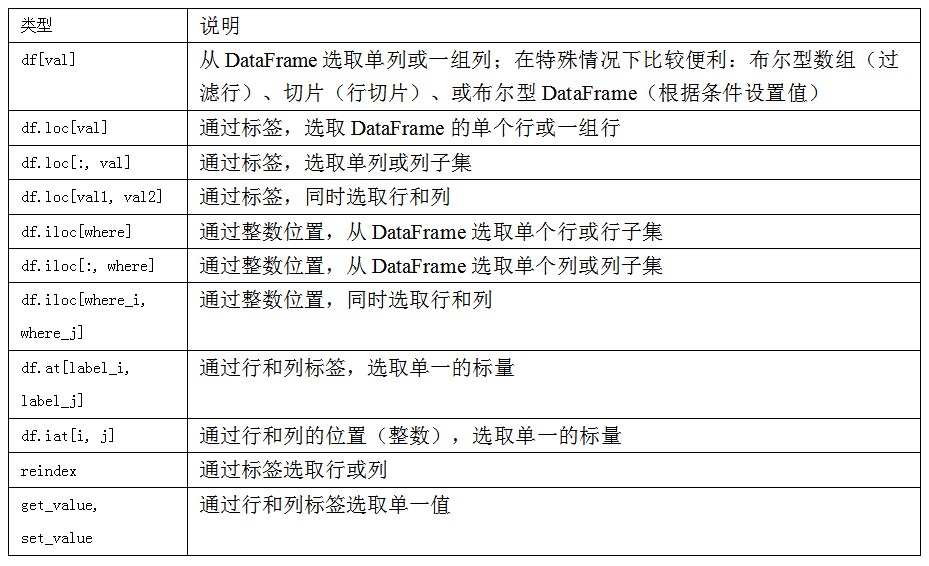

### 整数索引

处理整数索引的pandas对象常常难住新手，因为它与Python内置的列表和元组的索引语法不同。例如，你可能不认为下面的代码会出错：

In [ ]:
ser = pd.Series(np.arange(3.))
ser

In [ ]:
ser[-1]

在上面的例子中，由于Series的索引是整数，它包含0、1、2，所以ser[-1]会产生歧义，系统不知道用户索引的方式：是标签索引还是位置索引。但是，对于非整数索引，则不会存在歧义：

In [ ]:
ser2 = pd.Series(np.arange(3.),index=['a','b','c'])
ser2[-1]#位置索引

为了保持一致性，使用loc用于标签，或iloc用于整数：

In [ ]:
ser.loc[:1]#用于轴标签

In [ ]:
ser.iloc[:1]#用于整数索引

###  算术和数据对齐

含有不同索引的对象之间可以进行相加，返回结果的索引将是索引对的并集。另，会将NaN（即缺失值）赋值给没有重叠的值。

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3,3)),
                  columns=list('bcd'),index=['Ohio','Texas','Colorado'])
df1

In [ ]:
df2 = pd.DataFrame(np.arange(12.).reshape(4,3),columns=list('bde'),index=['Ohio','Texas','Utah','Oregon'])
df2

In [ ]:
df1 + df2

#### 使用填充值的算术方法

在两个含有不同的索引的对象之间进行算术操作时，想用特殊值进行填充，则可以使用算术方法时，传入一个fill_value参数：
+ fill_value的原则：在计算之前使用此值填充现有缺失（NaN）值，以及使Series成功对齐所需的任何新元素。对于无法进行对齐操作的行索引，如果相对应位置中都是NaN，则认为结果丢失。

In [62]:
df1.add(df2,fill_value=0)

NameError: name 'df1' is not defined

表5-5列出了Series和DataFrame的算术方法。它们每个都有一个副本，以字母r开头，它会翻转参数。因此这两个语句是等价的：

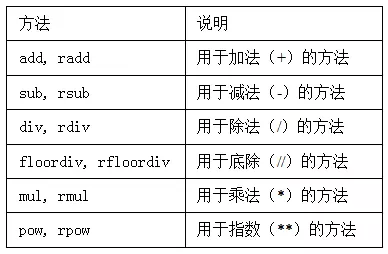

In [ ]:
1/df1

In [ ]:
df1.rdiv(1)#1做被除数

In [ ]:
df1.div(1)#1做除数

**当对Series和DataFrame重建索引时，也可以传递fill_vallue参数进行填充：**

In [ ]:
df1.reindex(columns=df2.columns,fill_value=0)

#### DataFrame和Series间的操作

DataFrame和Series间的算术操作与Numpy中不同维度书组间的操作类似。默认情况下，DataFrame和Series的数学操作中会将Series的索引和DataFrame的列进行匹配，并广播到各行：

In [ ]:
frame = pd.DataFrame(np.arange(12.).reshape((4,3)),columns=list('bde'),index=['Utah','Ohio','Texas','Oregon'])
frame

In [ ]:
series1 = frame.iloc[0]
series1

In [ ]:
series2 = frame.iloc[:,0]
series2

**默认按`列`匹配进行算术运算**

In [ ]:
frame.sub(series1)

**按`行`匹配进行算术运算**

In [ ]:
frame.sub(series2,axis='index')

### 函数应用和映射

NumyPy的通用函数（逐元素数组方法）对pandas对象也有效：

In [ ]:
frame = pd.DataFrame(np.random.randn(4,3),columns=list('bde'),index=['Utah','Ohio','Texas','Oregon'])
frame

In [ ]:
np.abs(frame)

另一种常用的函数操作是将函数应用到一行或一列的一维数组上。DataFrame的apply方法可以实现这个功能：
+ 默认`index`应用函数

In [ ]:
f = lambda x: x.max() - x.min()
frame.apply(f)

+ 按`columns`应用函数

In [ ]:
frame.apply(f,axis='columns')

+ 传递给apply的函数并不一定要返回一个标量值，也可以返回带有多个值的Series：

In [ ]:
def f(x):
    return pd.Series([x.min(),x.max()], index=['min','max'])
frame.apply(f)

+ applymap方法可以实现应用逐元素的python函数：

+ apply方法只能应用到一行或一列（即一个Series对象上）

In [ ]:
format = lambda x: '%.2f'%x
frame.applymap(format)

In [63]:
frame.apply(format)

state    0      Ohio\n1      Ohio\n2      Ohio\n3    Ne...
year     0    2000\n1    2001\n2    2002\n3    2001\n4 ...
pop      0    1.5\n1    1.7\n2    3.6\n3    2.4\n4    2...
dtype: object

+ Series也有类似applymapa的方法：map

In [64]:
frame['e'].map(format)

KeyError: 'e'

### 排序和排名

sort_index方法可以对Series和DataFrame进行按行或者按列进行字典排型序，这个方法返回的是一个新的，排序好的对象：

+ 对Series对象

In [ ]:
obj = pd.Series(range(4),index=list('dabc'))
obj

In [ ]:
obj.sort_index()

+ 对DataFrame对象

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2,4)),index=['three','one'],columns=list('dabc'))
frame

In [ ]:
frame.sort_index()#按index进行排序

In [ ]:
frame.sort_index(axis=1)#按columns排序

+ 数据会默认升序排序，但是也可以按照降序排序

In [ ]:
frame.sort_index(axis=1,ascending=False)

使用sort_values方法，可以对Series的值进行排序：

In [ ]:
obj = pd.Series([4,7,-3,2])

In [ ]:
obj.sort_values()#按值排名

默认情况下，所有的缺失值都会被排序**至Series的尾部：**

In [ ]:
obj = pd.Series([4,np.nan,7,np.nan,-3,2])
obj.sort_values()

当对DataFrame排序时，你可以使用一`列`或多`列`作为排序键。为了实现这个功能，传递一个或多个列名给sort_values的可选**参数by：**

In [ ]:
frame = pd.DataFrame({'b':[4,7,-3,2],'a':[0,1,0,1]})
frame

In [ ]:
frame.sort_values(by='b')

对多列排序时，传递列名的列表：

In [ ]:
frame.sort_values(by=['a','b'])

排名是指对数组从1到有效数据点总数分配名次大操作

Series和DataFrame的rank方法是实现排名的方法，该方法也返回一个新的对象
+ 默认情况下，rank通过将**平均排名分配**到每个组来打破评级关系：

In [ ]:
obj = pd.Series([7,-5,7,4,2,0,4])
obj

In [ ]:
obj.rank()

+ 排名也可以根据它们在数据中的观察顺序进行分配：另，在下面的例子中，对条目0和条目2设置的名次为6和7，而不是之前的平均排名6.5，是因为在数据中标签0在标签2的前面。

In [ ]:
obj.rank(method='first')

+ 还可以降序排列，另参数'max'表示对整个组用最大的排名

In [ ]:
obj.rank(ascending=False, method='max')

In [ ]:
obj.rank(ascending=False, method='min')#对整个组用最小排名

In [ ]:
#类似method='min'，但是组建排名总是增加1，而不是一个组中的相等的数量
obj.rank(ascending=False, method='dense')

DataFrame也可以对行或者对列计算排名

In [ ]:
frame = pd.DataFrame({'b':[4.3,7,-3,2],'a':[0,1,0,1],'c':[-2,5,8,-2.5]})
frame

In [ ]:
frame.rank(axis='index')#对DataFrame的每一列分别进行排名

In [ ]:
frame.rank(axis='columns')#对DataFrame的每一行分别进行排名

排名中的平级关系打破方法

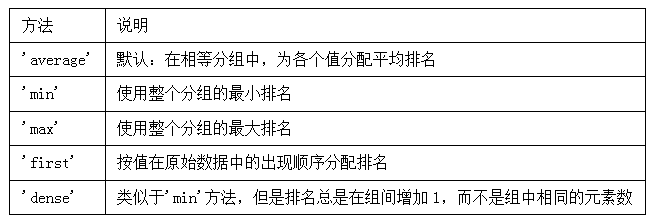

### 含有重复标签的轴索引

目前所见过的示例中，轴索引都是唯一的（索引值）。但这不是强制的，下面考虑一个小型的带有重复索引的Series：

In [ ]:
obj = pd.Series(range(5), index=list('aabbc'))
obj

索引的is_unique**属性**可以告诉我们标签是否唯一：

In [ ]:
obj.index.is_unique

在带有重复索引的情况下，数据选择与之的操作有所差别：
+ 根据一个标签索引多个条目会返回一个序列，而单个条目会返回标量值

In [ ]:
obj['a']

-5.3

In [ ]:
obj['c']

3.6

> 这样可能会是代码更复杂，因为来自索引的输出类型可能因标签是否重复而有所不同。

相同的逻辑可以拓展到在DataFrame中进行索引：

In [ ]:
df = pd.DataFrame(np.random.randn(4,3), index=list('aabb'))
df

,0,1,2
a,-0.233885,0.139593,-1.443806
a,-0.655567,0.467956,1.853350
b,0.782474,-1.045256,2.229240
b,-0.882020,-0.952869,-0.968087


In [ ]:
df.loc['b']

,0,1,2
b,0.782474,-1.045256,2.229240
b,-0.882020,-0.952869,-0.968087


## 描述性统计的概述与计算

pandas对象装配了一个常用数学，统计学方法的集合。其中大部分属于规约或汇总统计的类别，这些方法从DataFrame行或列中抽取一个Series或一系列值的单个值（如总和或平均值）。与Numpy数组中的类似方法相比，它们内建了处理缺失值的功能。考虑一个小型DataFrame：

In [ ]:
df = pd.DataFrame([[1.4,np.nan],[7.1,-4.5],[np.nan,np.nan],[0.75,-1.3]],
                  index=list('abcd'),columns=['one','two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


调用DataFrame的sum方法返回一个包含列上加和的Series：

In [ ]:
df.sum()

one    9.25
two   -5.80
dtype: float64

传入axis='columns'或axis=1，则会将一行上各个列的值相加:

In [ ]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

**除非整个切片上（在本例中是行或列）都是NA，否则NA值是被自动排出的。可以通过禁用skipna来实现不排除NA值：**

In [ ]:
df.mean(axis='columns', skipna = False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

下表是规约方法的常用可选参数列表：

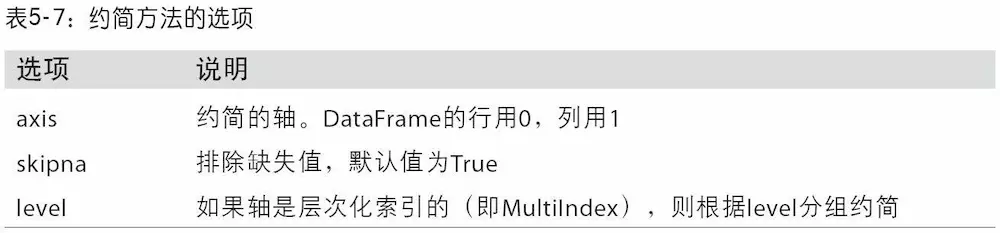

一些方法，比如idxmax和idxmin，返回的是间接统计信息。比如最大值或最小值的索引值：

In [ ]:
df.idxmax()

one    b
two    d
dtype: object

In [ ]:
df.idxmax(axis=1)

除了规约方法外，有的方法累积型方法：

In [ ]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


describe()方法一次性产生多个汇总统计：

In [ ]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


对于非数值数据，describe()产生另一种汇总统计：

In [ ]:
obj = pd.Series(['a','a','b','c']*4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [ ]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

下表是汇总统计及其相关**方法**的完整列表

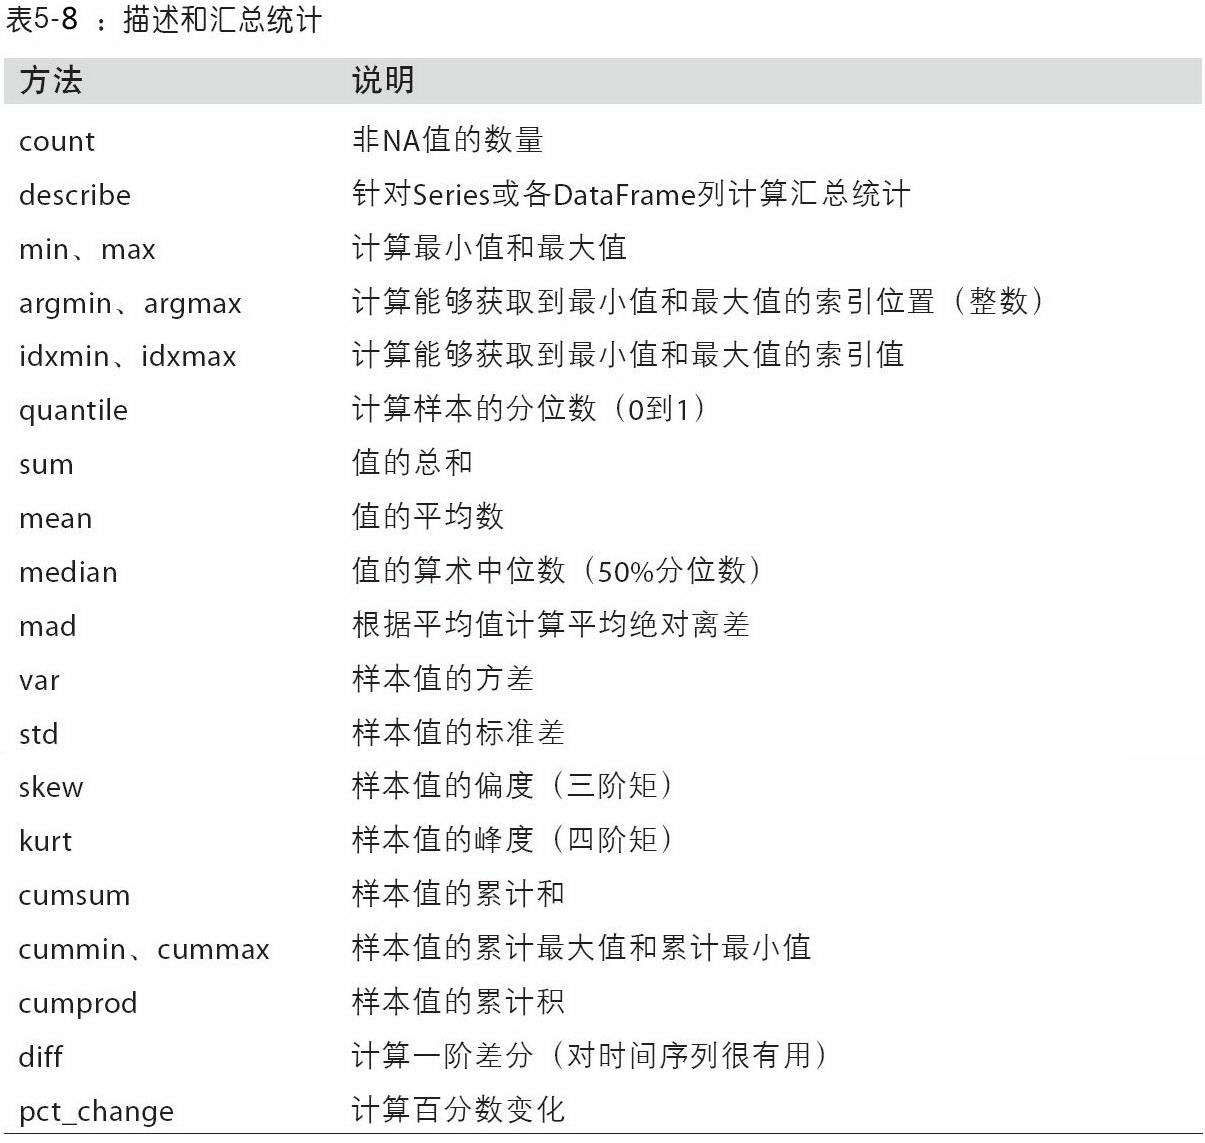

### 相关系数和协方差

一些汇总统计，比如相关性和协方差，是由多个参数计算出的。
+ corr、cov、corrwith

数据准备

In [ ]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL','IBM','MSFT','GOOD']}
price = pd.DataFrame({ticker: data['Adj Close'] for  ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})

计算股价的百分比：

In [ ]:
returns = price.pct_change()#计算当前元素与先前元素的百分比

In [ ]:
returns.tail()

Series的corr方法计算的是两个Series中重叠的、非NA的、按索引对齐的值相关系数。相应地，cov计算的是协方差：

In [ ]:
returns['MSFT'].corr(returns['IBM'])

In [ ]:
returns['MSFT'].cov(returns['IBM'])

由于MSFT是一个有效的python属性，我们可以使用更为简洁的语法来获得这些数据：

In [ ]:
returns.MSFT.corr(returns.IBM)

另一方面，DataFrame的corr和cov方法会分别以DataFrame的形式返回相关系数和协方差矩阵：

In [ ]:
returns.corr()

In [ ]:
returns.cov()

使用DataFrame的corrwith方法，可以计算出DataFrame中的行或列与另一个序列或DataFrame的相关性。

+ 该方法传入一个Series时，会返回一个含有为每列计算相关系数的Series

In [ ]:
returns.corrwith(returns.IBM)

传入一个DataFrame时，会根据匹配到的列名计算相关系数。下面计算一下交易量百分比变化的相关性：

In [ ]:
returns.corrwith(volume)

传入axis='columns'会逐行地进行计算。在所有例子中，在计算相关性之前，数据已经按标签进行了对齐。

### 唯一值、计数和成员属性
+ 针对values

还有一种方法，它可以从一维Series包含的数值中提取信息。请看下面的例子：

In [ ]:
obj = pd.Series(list('cadaabbcc'))
obj

unique()方法，它会给出Series中的唯一值。同时它也是pandas的顶层方法

In [ ]:
uniques = obj.unique()
uniques

In [ ]:
pd.unique(obj)

+ 唯一值并不一定按照排序好的顺序返回，但是可以进行排序（uniques.sort()）。

value_counts方法，计算Series包含的值的个数，返回的Series按照数量降序排列。同时，它也是pandas的顶层方法

In [ ]:
obj.value_counts()

In [ ]:
pd.value_counts(obj.values,sort=False)#不排序

isin执行向量化的成员属性检查，还可以应用在过滤Series或DataFrame一列中的数据的子集：

In [ ]:
obj

In [ ]:
mask = obj.isin(list('bc'))#检查obj中的值是否在['b','c']中
mask

In [ ]:
obj[mask]

与isin相关的Index.get_indexer方法，该方法返回一个索引数组，这个索引数组的各个值是非唯一值数组中的元素在唯一值数组中轴索引值。

In [ ]:
to_match = pd.Series(list('cabbca'))
to_match

In [ ]:
unique_vals = pd.Series(list('cba'))
unique_vals

In [ ]:
pd.Index(unique_vals).get_indexer(to_match)

唯一值、计数和集合成员属性方法

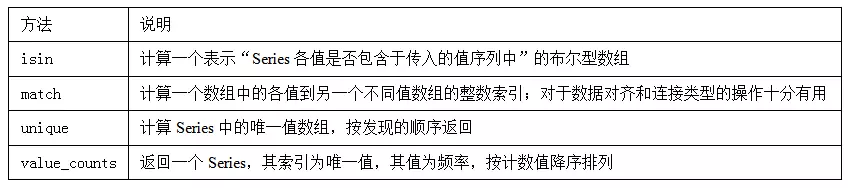

计算在DataFrame中的所有元素在每一列中c出现的频数：

In [ ]:
data = pd.DataFrame({'Qu1':[1,3,4,3,4],
                    'Qu2':[2,3,1,2,3],
                    'Qu3':[1,5,2,4,4]})
data

In [ ]:
result = data.apply(pd.value_counts).fillna(0)
result